In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from numpy import arange
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('US_House_Price.csv')

In [30]:
print(data.head())


         DATE  building_permits  const_price_index  delinquency_rate  \
0  2003-01-01              1808              144.4              1.97   
1  2003-02-01              1854              145.2              1.97   
2  2003-03-01              1757              145.2              1.97   
3  2003-04-01              1803              145.9              1.83   
4  2003-05-01              1835              145.8              1.83   

         GDP  house_for_sale_or_sold  housing_subsidies   income  \
0  14614.141                      76              25.93  10710.4   
1  14614.141                      82              25.93  10674.0   
2  14614.141                      98              25.93  10696.5   
3  14743.567                      91              25.93  10752.7   
4  14743.567                     101              25.93  10832.0   

   interest_rate  mortgage_rate  construction_unit  total_houses  \
0           1.24         5.9160               1654      111278.0   
1           1.26      

In [33]:
# Some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    240 non-null    object 
 1   building_permits        240 non-null    int64  
 2   const_price_index       240 non-null    float64
 3   delinquency_rate        240 non-null    float64
 4   GDP                     240 non-null    float64
 5   house_for_sale_or_sold  240 non-null    int64  
 6   housing_subsidies       240 non-null    float64
 7   income                  240 non-null    float64
 8   interest_rate           240 non-null    float64
 9   mortgage_rate           240 non-null    float64
 10  construction_unit       240 non-null    int64  
 11  total_houses            240 non-null    float64
 12  total_const_spending    240 non-null    float64
 13  unemployment_rate       240 non-null    float64
 14  urban_population        240 non-null    fl

In [51]:
data.size

1000

In [52]:
data.shape

(1000,)

In [35]:
data.describe()


,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,1309.350000,212.851467,4.876750,18095.159938,55.550000,34.677450,13493.480833,1.301625,4.683308,1201.716667,121344.45000,0.324583,6.012083,81.261200,180.657817
std,479.881055,44.566715,3.305235,2002.293963,25.383865,6.006483,1837.485256,1.578512,1.110667,423.857641,6113.86894,1.950373,2.034118,1.055429,41.255706
min,513.000000,144.400000,1.410000,14614.141000,20.000000,25.930000,10674.000000,0.050000,2.684000,520.000000,111278.00000,-5.900000,3.500000,79.583000,128.461000
25%,979.000000,184.275000,2.087500,16547.088000,36.000000,29.785000,12115.575000,0.120000,3.801375,839.000000,116590.00000,-0.800000,4.575000,80.395750,148.123000
50%,1285.500000,207.450000,3.525000,17576.126000,49.000000,33.544500,12999.350000,0.400000,4.456750,1181.500000,121771.50000,0.800000,5.400000,81.209000,172.496500
75%,1685.000000,224.525000,7.830000,19716.162500,71.000000,37.877250,14820.075000,2.000000,5.752500,1440.000000,126564.50000,1.600000,7.350000,82.107500,197.462000
max,2263.000000,353.015000,11.480000,21989.981000,127.000000,48.021000,20422.600000,5.260000,6.900000,2245.000000,131202.00000,5.000000,14.700000,83.084000,304.755000


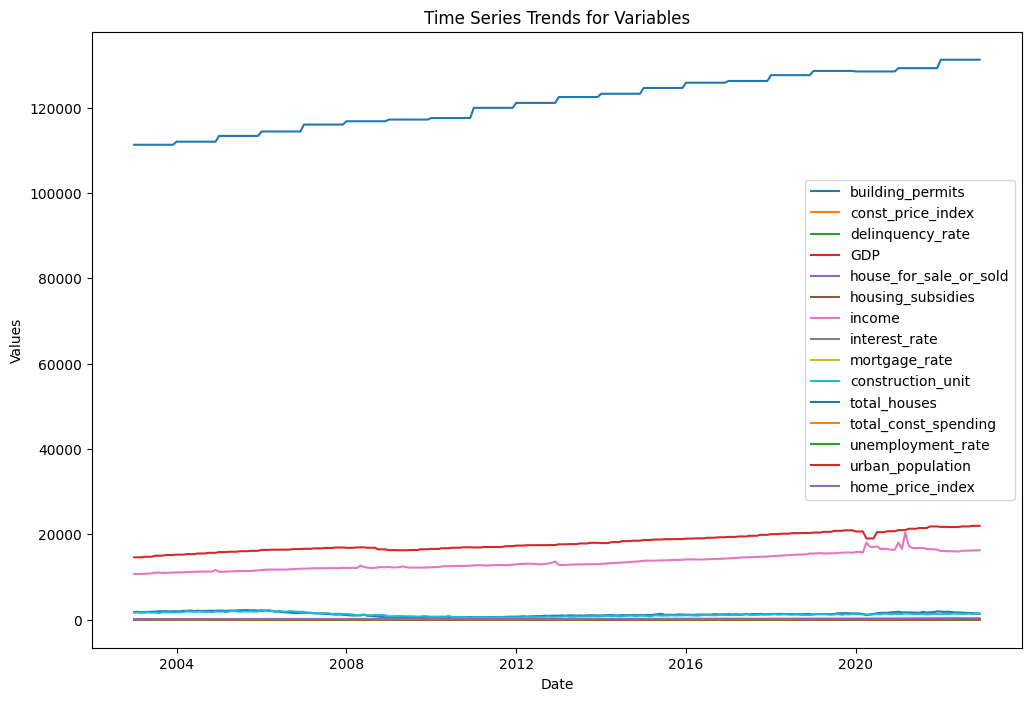

In [38]:
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert 'DATE' column to datetime if it's not already

# Set 'DATE' column as index for time series plotting
data.set_index('DATE', inplace=True)

# Plotting time series for each variable
plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.title('Time Series Trends for Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#705e5d; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #5a463d">Evaluate Algorithms</p>

<p style="font-family:JetBrains Mono;font-size:140%;color:#705e5d; letter-spacing: 2px; font-weight: bold">Linear Algorithms:</p>


>       Linear Regression (LR)
>  
>       Lasso Regression (LASSO)
>  
>       ElasticNet (EN)

<p style="font-family:JetBrains Mono;font-size:140%;color:#705e5d;letter-spacing: 2px; font-weight: bold">Nonlinear Algorithms:</p>


 >      Classification and Regression Trees (CART)
 >
 >      Support Vector Regression (SVR)
 >   
 >      k-Nearest Neighbors (KNN)

In [13]:
# Test options and evaluation metric
num_folds = 10
scoring = 'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [15]:
X = data.drop(columns=['DATE', 'home_price_index'])  # Features
y = data['home_price_index']  # Target variable

In [17]:
X_train, X_val, Y_train, Y_val = split(X, y, test_size=0.3, random_state=1313)


In [18]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

    print('\033[94m {}: MSE = {}, std = {}'.format(name, cv_results.mean(),
                                          cv_results.std()))

 LR: MSE = -33.31958657606445, std = 35.42991607931904
 LASSO: MSE = -30.8045740993745, std = 7.801141778740204
 EN: MSE = -31.351171749518976, std = 7.914486657943948
 KNN: MSE = -18.286292332897062, std = 9.387835744114064
 CART: MSE = -12.954809190441162, std = 5.647386078062068
 SVR: MSE = -1987.0690966054729, std = 608.782674971238


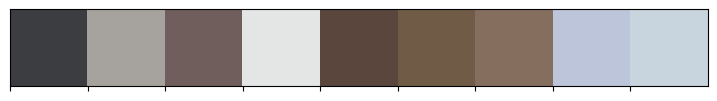

In [20]:
# Create palette for the boxplots
cmap1 = ["#3c3d40", "#a6a29e", "#705e5d", '#e4e6e5', "#5a463d", '#705b47',
                              '#866e5f', "#bcc5d9", "#c9d5de"]
sns.palplot(sns.color_palette(cmap1))

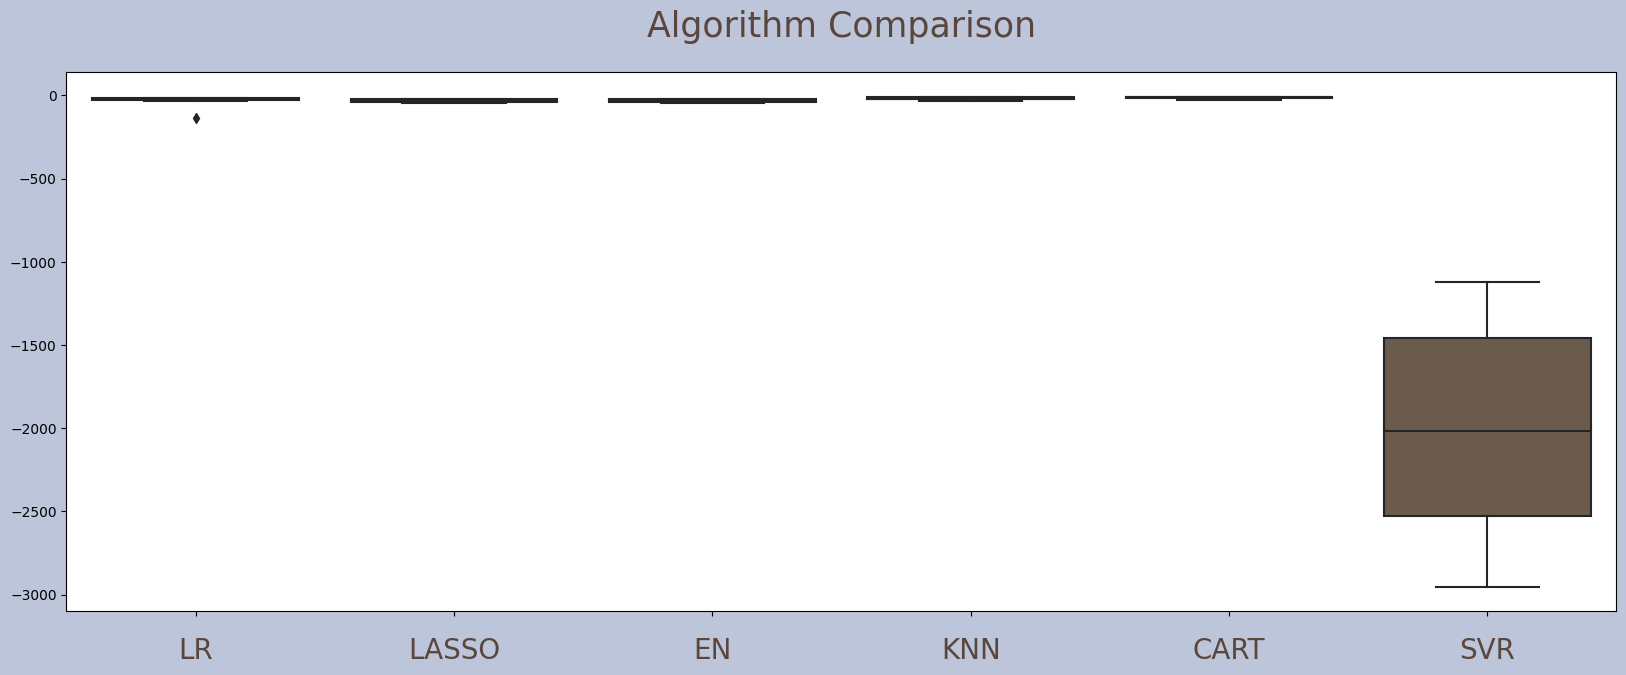

In [21]:
# Compare Algorithms
fig = plt.figure(figsize = (20,7), facecolor = '#bcc5d9')
fig.suptitle
ax = fig.add_subplot(111)
sns.boxplot(data = results, palette = cmap1)
ax.set_xticklabels(names, size=20, color = '#5a463d', y=-0.03)
plt.title('Algorithm Comparison', fontsize=25, color = '#5a463d', y=1.05)
plt.show()

# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#705e5d; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #5a463d">Evaluate Algorithms: Stardadization</p>

In [22]:
# Standardize the dataset
pipelines = []
pipelines.append(('Scaled_LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Scaled_LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('Scaled_EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('Scaled_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('Scaled_CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('Scaled_SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('\033[94m {}: MSE = {}, std = {}'.format(name, cv_results.mean(),
                                          cv_results.std()))

 Scaled_LR: MSE = -33.31958657606684, std = 35.42991607932032
 Scaled_LASSO: MSE = -30.107340259819374, std = 5.306677298955372
 Scaled_EN: MSE = -120.08917434870875, std = 43.27256316470072
 Scaled_KNN: MSE = -18.38268991339706, std = 8.998299566344345
 Scaled_CART: MSE = -25.07031498492647, std = 33.16547803016289
 Scaled_SVR: MSE = -1091.1666300168524, std = 467.52082082948033


# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#705e5d; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #5a463d">Improve Results With Tuning</p>

In [23]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("\033[94m Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
print('\033[94m _'*24)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

 Best: -12.584628 using {'n_neighbors': 1}
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
-12.584628 (7.077453) with: {'n_neighbors': 1}
-15.772202 (8.874727) with: {'n_neighbors': 3}
-18.777807 (8.841318) with: {'n_neighbors': 5}
-26.166850 (10.451613) with: {'n_neighbors': 7}
-42.479054 (23.344573) with: {'n_neighbors': 9}
-69.988763 (34.238994) with: {'n_neighbors': 11}
-102.099412 (48.063222) with: {'n_neighbors': 13}
-127.596594 (65.290978) with: {'n_neighbors': 15}
-146.208650 (79.393488) with: {'n_neighbors': 17}
-172.457993 (92.201607) with: {'n_neighbors': 19}
-197.677915 (106.930444) with: {'n_neighbors': 21}


# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#705e5d; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #5a463d">Ensemble Methods</p>

 <p style="font-family:JetBrains Mono;font-size:140%;color:#705e5d; letter-spacing: 2px; font-weight: bold">Boosting Methods:</p>


>       AdaBoost (AB)
>  
>       Gradient Boodting (GBM)


<p style="font-family:JetBrains Mono;font-size:140%;color:#705e5d;letter-spacing: 2px; font-weight: bold">Bagging Methods:</p>


 >      Random Forest (RF)
 >
 >      Extra Trees (ET)

In [24]:
# Ensembles
ensembles = []
ensembles.append(('Scaled_AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('Scaled_GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('Scaled_RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('Scaled_ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "\033[94m %s: %f (%f)" % (name, cv_results.mean(),
                           cv_results.std())
    print(msg)

 Scaled_AB: -21.218287 (5.712320)
 Scaled_GBM: -8.830870 (7.576888)
 Scaled_RF: -12.176618 (10.243331)
 Scaled_ET: -3.964721 (2.686317)


# Tune Ensemble Methods

In [25]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[100,200,250,300,400]}

model = GradientBoostingRegressor(random_state=1313, learning_rate = 0.1,
                                  max_depth = 4, min_samples_leaf = 3)
kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)



print("\033[94m Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
print('\033[94m _'*24)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


 Best: -15.301970 using {'n_estimators': 400}
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
-15.505482 (22.095241) with: {'n_estimators': 100}
-15.348390 (21.899619) with: {'n_estimators': 200}
-15.327530 (21.873499) with: {'n_estimators': 250}
-15.311899 (21.853342) with: {'n_estimators': 300}
-15.301970 (21.837040) with: {'n_estimators': 400}


In [26]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([100,200,250,300,400]))
model = ExtraTreesRegressor(random_state=1313)

kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("\033[94m Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
print('\033[94m _'*24)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

 Best: -3.038677 using {'n_estimators': 250}
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
-3.513886 (3.766433) with: {'n_estimators': 100}
-3.242588 (3.648285) with: {'n_estimators': 200}
-3.038677 (3.035627) with: {'n_estimators': 250}
-3.040582 (3.052030) with: {'n_estimators': 300}
-3.225147 (3.612683) with: {'n_estimators': 400}


**Final Model**

Scale the inputs for the validation dataset and generate predictions

In [27]:
# Prepare the GBM model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=1313, n_estimators=250,
                                  learning_rate=0.1, max_depth = 4,
                                  min_samples_leaf = 3)
model.fit(rescaledX, Y_train)

# Transform the validation dataset
rescaledValidationX = scaler.transform(X_val)
predictions = model.predict(rescaledValidationX)
print('\033[94m GBM model: MSE = {}'.format(mean_squared_error(Y_val, predictions)))

 GBM model: MSE = 6.665891176374767


In [28]:
# Prepare the ET model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=1313, n_estimators=250)
model.fit(rescaledX, Y_train)

# Transform the validation dataset
rescaledValidationX = scaler.transform(X_val)
predictions = model.predict(rescaledValidationX)
print('\033[94m ET model: MSE = {}'.format(mean_squared_error(Y_val, predictions)))

 ET model: MSE = 2.6883621317775717
